# ** Forest FIRES PREDICTION**

![](https://www.fodors.com/wp-content/uploads/2020/11/brazil-fire-1.jpg)

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET
I use the latin1 encoding. Latin1 is known for interpreting basically every character (but not necessarily as the character you’d expect). Consequently, the chances are that latin1 will be able to read the file without producing errors.

In [2]:
data= pd.read_csv("amazon.csv", encoding = 'latin1')
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [3]:
def new_month(old, new_m):
    data.month.replace(old, new_m,inplace=True)
new_month('Janeiro', 'January')
new_month('Fevereiro','February')
new_month('Março','March')
new_month('Abril','April')
new_month('Maio','May')
new_month('Junho','June')
new_month('Julho','July')
new_month('Agosto','August')
new_month('Setembro','September')
new_month('Outubro','October')
new_month('Novembro','November')
new_month('Dezembro','December')

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [5]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [7]:
data.value_counts

<bound method DataFrame.value_counts of       year      state     month  number        date
0     1998       Acre   January     0.0  1998-01-01
1     1999       Acre   January     0.0  1999-01-01
2     2000       Acre   January     0.0  2000-01-01
3     2001       Acre   January     0.0  2001-01-01
4     2002       Acre   January     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  December   128.0  2012-01-01
6450  2013  Tocantins  December    85.0  2013-01-01
6451  2014  Tocantins  December   223.0  2014-01-01
6452  2015  Tocantins  December   373.0  2015-01-01
6453  2016  Tocantins  December   119.0  2016-01-01

[6454 rows x 5 columns]>

In [8]:
data.shape

(6454, 5)

In [9]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [10]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

**Checking Null Values**



In [11]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
data.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [13]:
data.drop_duplicates(inplace = True)

# **DATA PREPROCESSING**

In [14]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [15]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])
data

,year,state,month,number,date
0,1998,0,4,0.0,0
1,1999,0,4,0.0,1
2,2000,0,4,0.0,2
3,2001,0,4,0.0,3
4,2002,0,4,0.0,4
...,...,...,...,...,...
6449,2012,22,2,128.0,14
6450,2013,22,2,85.0,15
6451,2014,22,2,223.0,16
6452,2015,22,2,373.0,17


# **Visualization**

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**



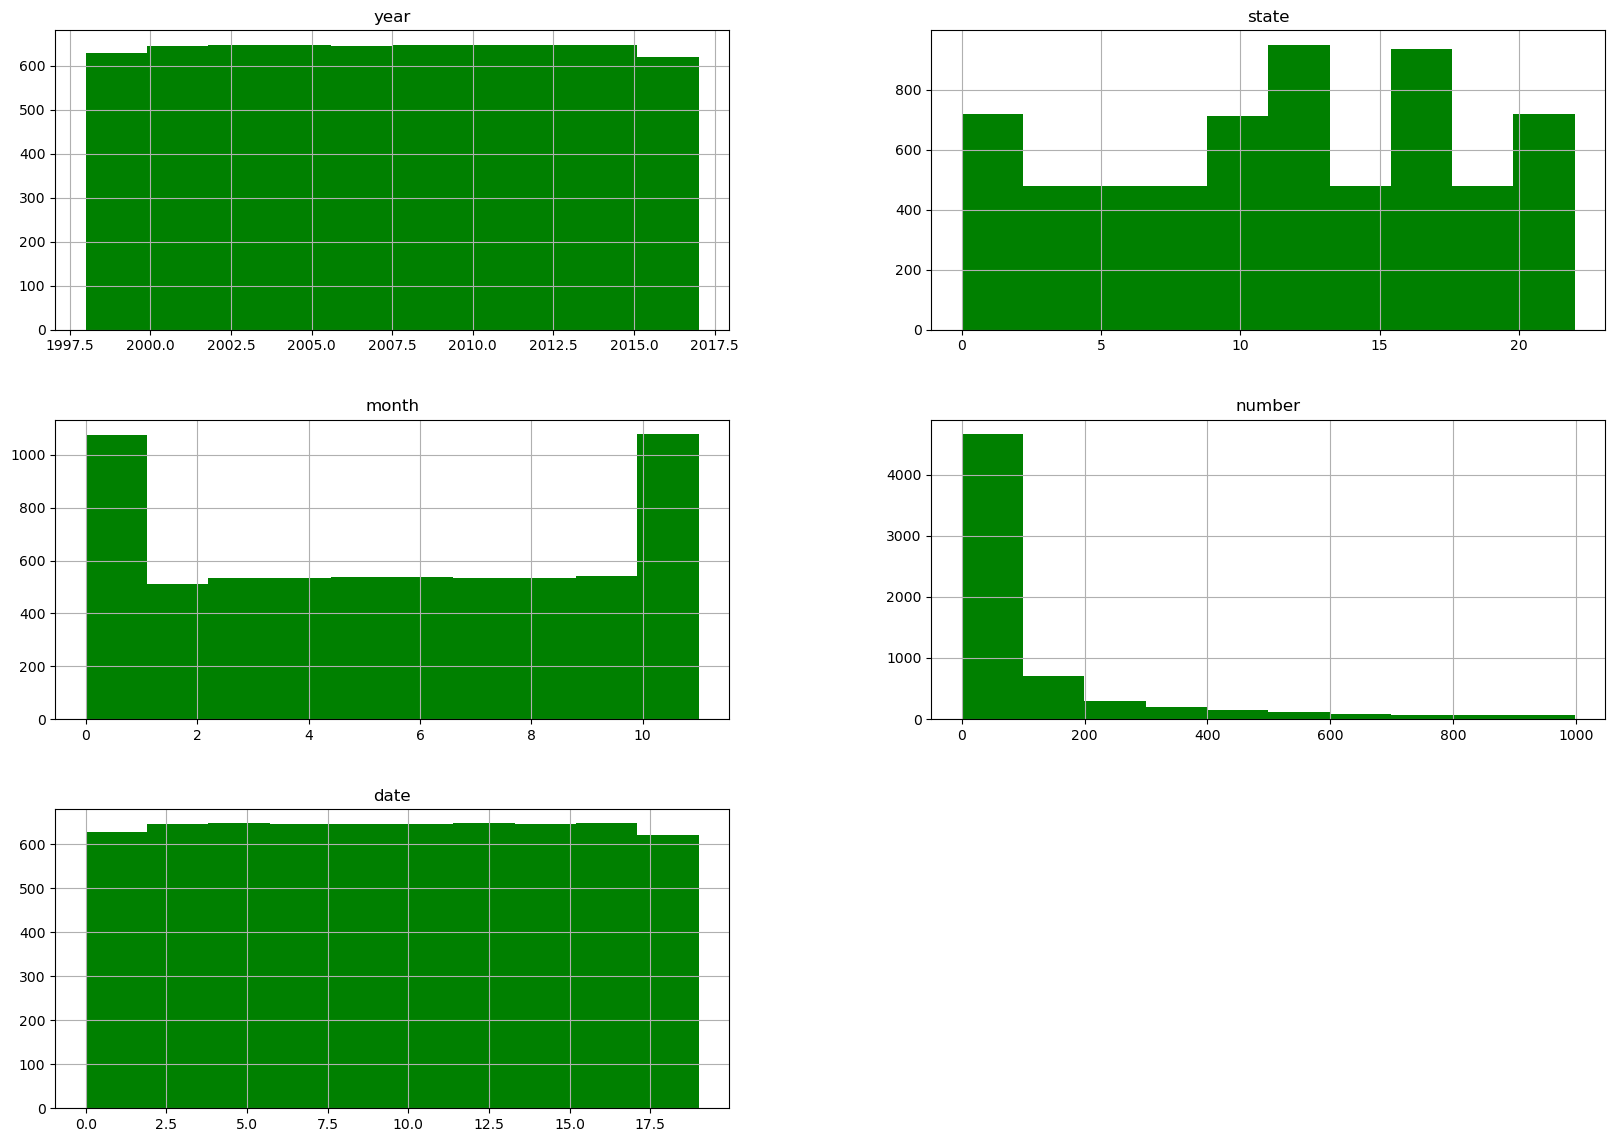

In [18]:
data.hist(figsize=(20,14),color='g')
plt.show()

![](https://hwnews.in/wp-content/uploads/2019/08/Amazon-forest-fire-960x540.jpg)

In [19]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



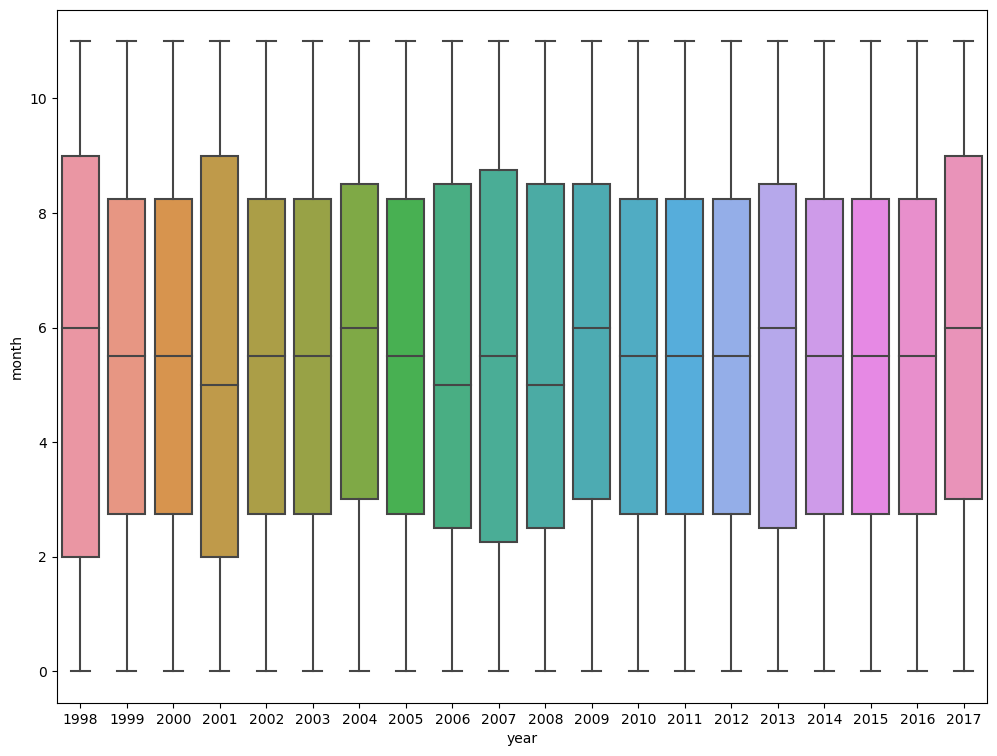

In [20]:
plt.figure(figsize=(12,9))
sns.boxplot(x='year',y='month',data=data,)
plt.show()


**SCATTER PLOT**

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.**



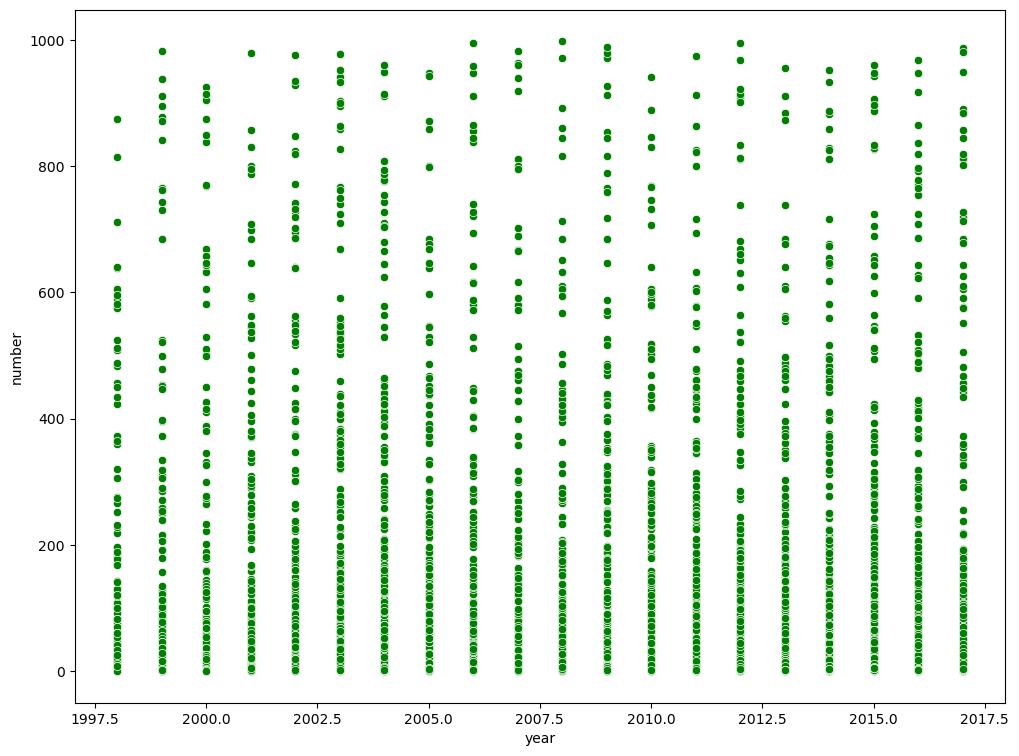

In [21]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='year',y='number',data=data,color='g')
plt.show()

**LINEPLOT**

**A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.**



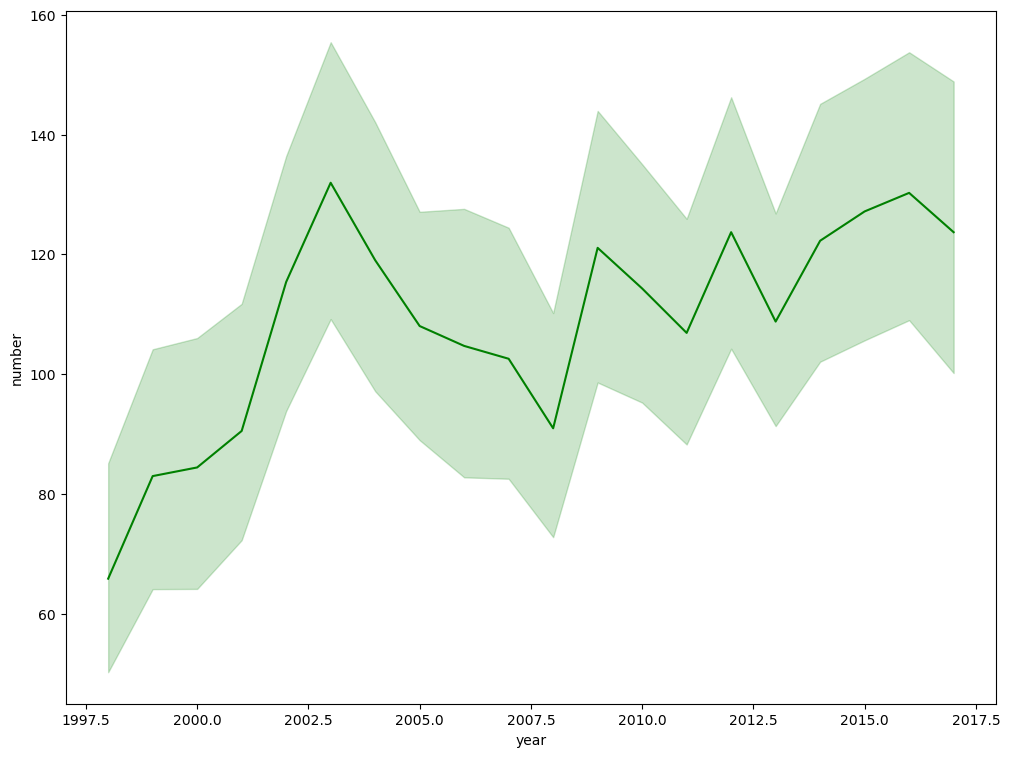

In [22]:
plt.figure(figsize=(12,9))
sns.lineplot(x='year',y='number',data=data,color='g')
plt.show()

![](https://api.time.com/wp-content/uploads/2019/08/sebastian-liste-amazon-fires-brazil-3.jpg)

In [23]:
data.corr()

,year,state,month,number,date
year,1.000000,0.002014,0.005806,0.062600,1.000000
state,0.002014,1.000000,0.000426,0.021142,0.002014
month,0.005806,0.000426,1.000000,0.052094,0.005806
number,0.062600,0.021142,0.052094,1.000000,0.062600
date,1.000000,0.002014,0.005806,0.062600,1.000000


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**

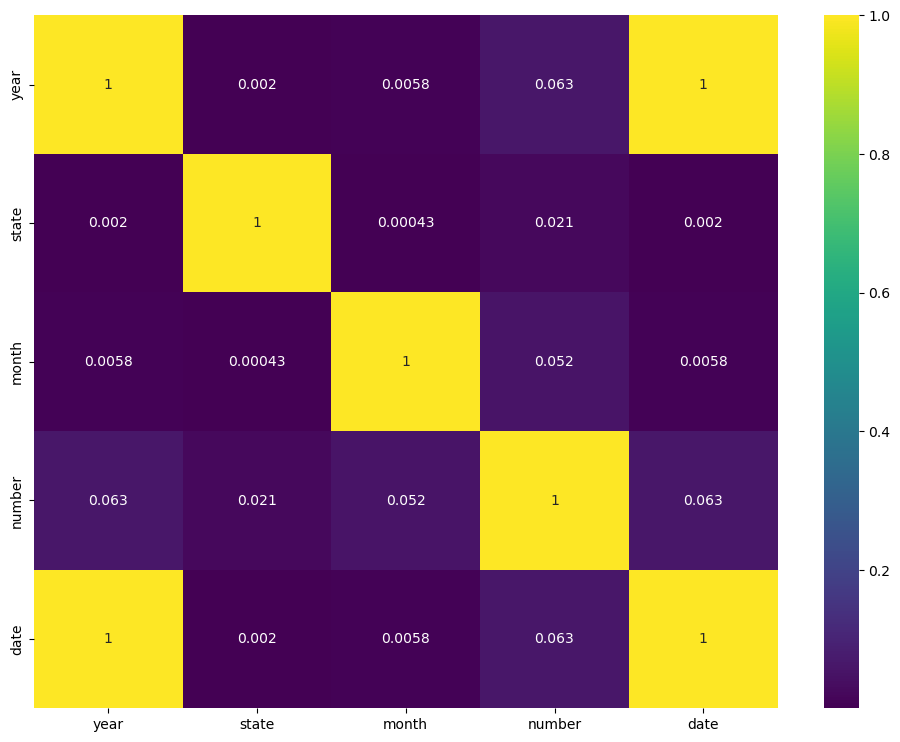

In [24]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.show()

**PAIRPLOT**

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.**


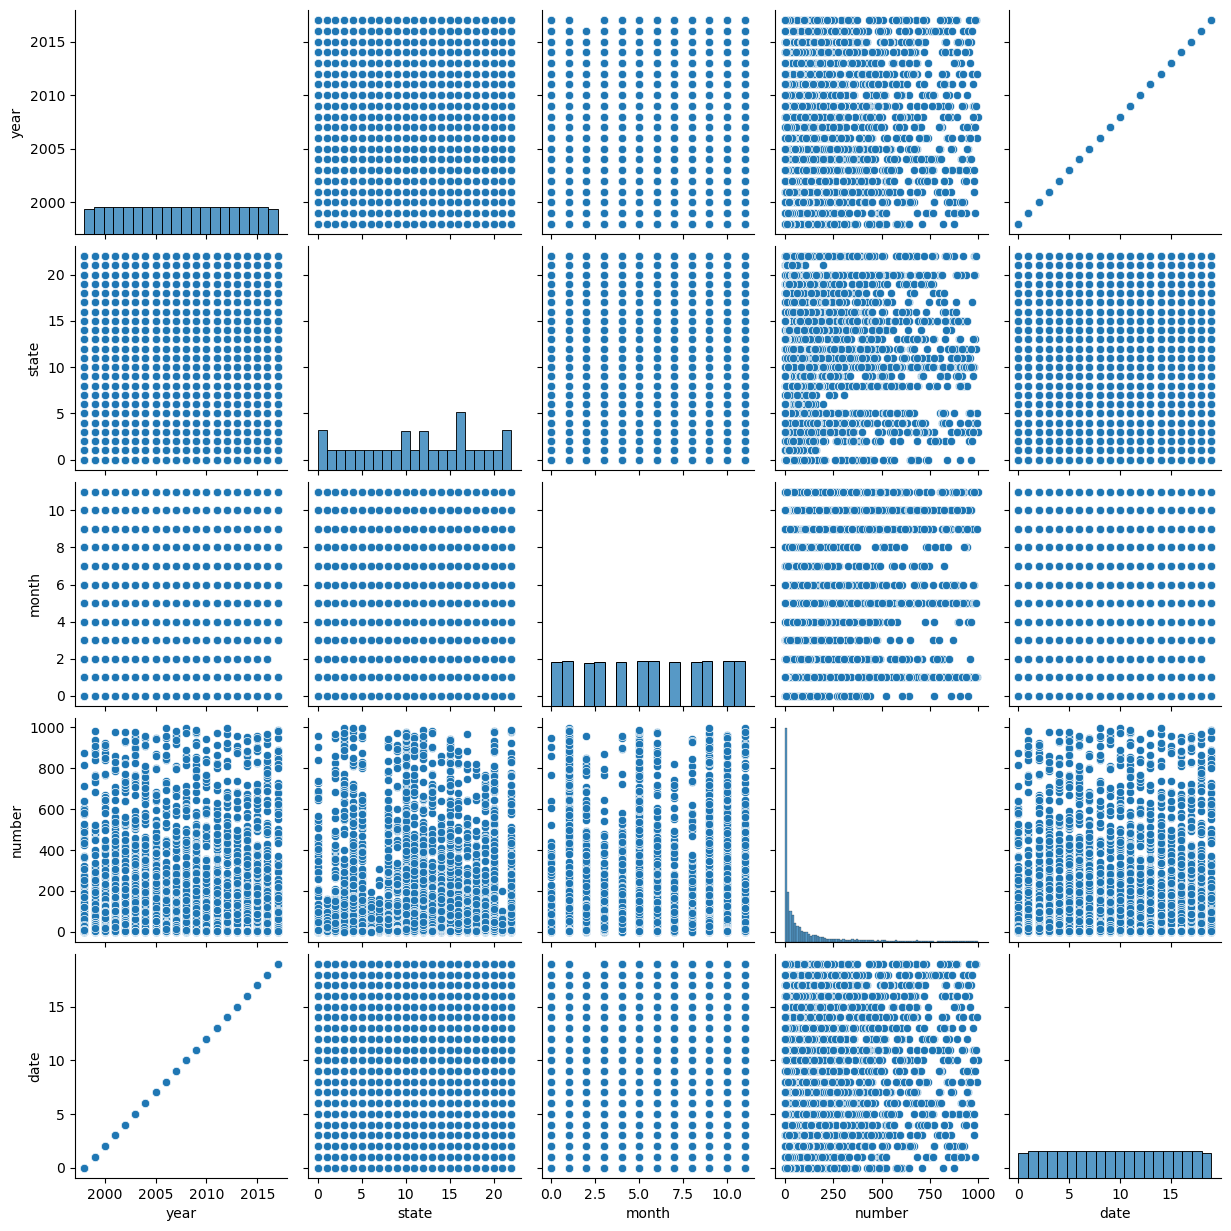

In [25]:
sns.pairplot(data=data)


**BARPLOT**

**A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.**

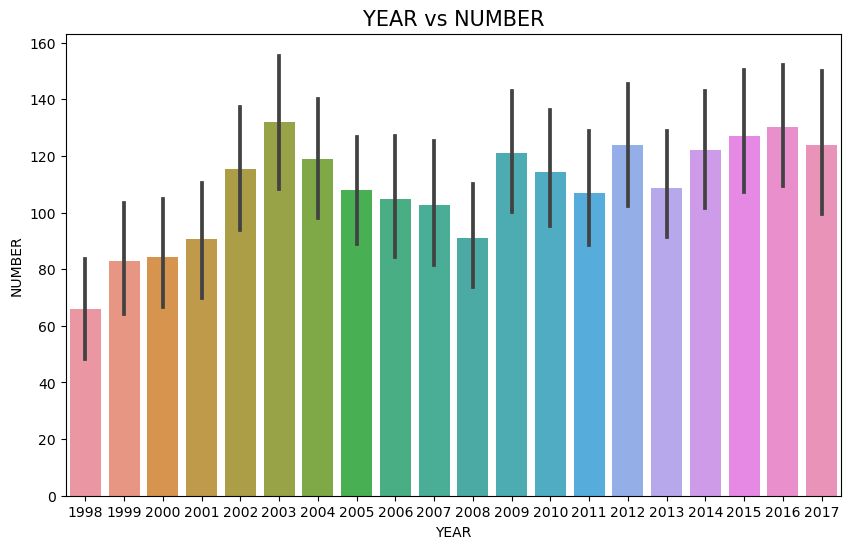

In [26]:
plt.figure(figsize=(10,6))
plt.style.use("default")
sns.barplot(x="year", y="number",data=data)
plt.title("YEAR vs NUMBER",fontsize=15)
plt.xlabel("YEAR")
plt.ylabel("NUMBER")
plt.show()


![](https://i.guim.co.uk/img/media/318697f53f1aba1c90b2d95e908e217314e37e7e/0_164_2480_1489/500.jpg?quality=85&auto=format&fit=max&s=86e302106077e9ac3c6da4485fcc629f)

**TRAINING AND TESTING DATA**

In [27]:
y=data['year']
x=data.drop(['year'],axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [28]:
print(len(x_test))
print(len(x_train))
print(len(y_test))
print(len(y_train))


1285
5137
1285
5137


# MODELS

**1. KNeighborsClassifier**

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**



In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Testing score\n",accuracy_score(y_test,y_pred)*100)


Classification Report is:
               precision    recall  f1-score   support

        1998       0.47      0.58      0.52        66
        1999       0.19      0.23      0.21        62
        2000       0.23      0.22      0.22        78
        2001       0.21      0.21      0.21        56
        2002       0.14      0.19      0.17        57
        2003       0.19      0.24      0.21        58
        2004       0.24      0.24      0.24        71
        2005       0.21      0.17      0.19        72
        2006       0.23      0.33      0.27        57
        2007       0.34      0.33      0.34        67
        2008       0.19      0.21      0.20        57
        2009       0.29      0.28      0.28        65
        2010       0.38      0.42      0.40        60
        2011       0.20      0.18      0.19        71
        2012       0.19      0.21      0.20        56
        2013       0.28      0.23      0.25        74
        2014       0.17      0.17      0.17        66


In [31]:
values1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
values1

,Actual,Predicted
5253,2011,2011
1132,2013,2014
842,2002,2003
3368,1999,1998
5687,2007,2006
...,...,...
1070,2011,2009
3106,2015,2015
2698,2006,2006
3228,1998,2002


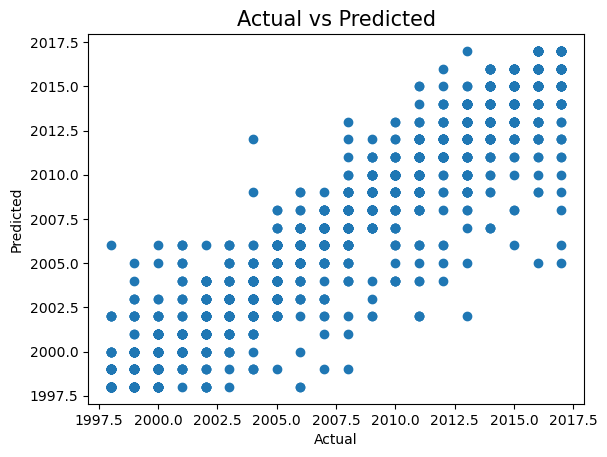

In [32]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted",fontsize=15)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**2.Naive Bayes** 

**Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.**

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [34]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Testing score\n",accuracy_score(y_test,y_pred)*100)


Classification Report is:
               precision    recall  f1-score   support

        1998       1.00      1.00      1.00        66
        1999       1.00      1.00      1.00        62
        2000       1.00      1.00      1.00        78
        2001       1.00      1.00      1.00        56
        2002       1.00      1.00      1.00        57
        2003       1.00      1.00      1.00        58
        2004       1.00      1.00      1.00        71
        2005       1.00      1.00      1.00        72
        2006       1.00      1.00      1.00        57
        2007       1.00      1.00      1.00        67
        2008       1.00      1.00      1.00        57
        2009       1.00      1.00      1.00        65
        2010       1.00      1.00      1.00        60
        2011       1.00      1.00      1.00        71
        2012       1.00      1.00      1.00        56
        2013       1.00      1.00      1.00        74
        2014       1.00      1.00      1.00        66


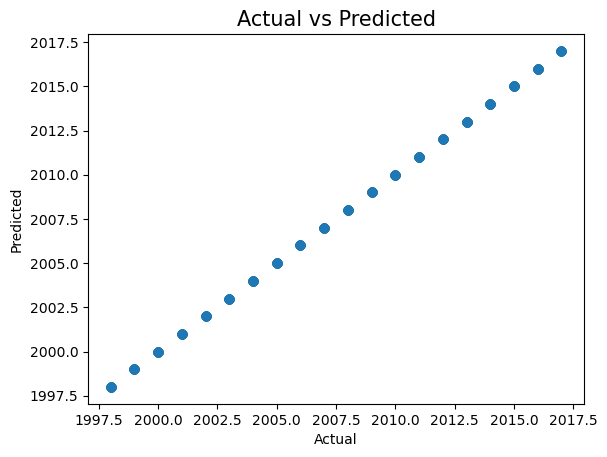

In [35]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted",fontsize=15)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**3. DECISION TREE CLASSIFIER**

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**



In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=55,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=55)

In [37]:
from sklearn.metrics import classification_report,mean_squared_error
y_pred=dtree.predict(x_test)
clf =print(classification_report(y_test, y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Testing score\n",accuracy_score(y_test,y_pred)*100)


              precision    recall  f1-score   support

        1998       0.00      0.00      0.00        66
        1999       0.48      1.00      0.65        62
        2000       1.00      1.00      1.00        78
        2001       1.00      1.00      1.00        56
        2002       1.00      1.00      1.00        57
        2003       1.00      1.00      1.00        58
        2004       0.50      1.00      0.66        71
        2005       0.00      0.00      0.00        72
        2006       1.00      1.00      1.00        57
        2007       1.00      1.00      1.00        67
        2008       1.00      1.00      1.00        57
        2009       1.00      1.00      1.00        65
        2010       0.46      1.00      0.63        60
        2011       0.00      0.00      0.00        71
        2012       1.00      1.00      1.00        56
        2013       1.00      1.00      1.00        74
        2014       1.00      1.00      1.00        66
        2015       1.00    

In [38]:
values3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
values3

,Actual,Predicted
5253,2011,2010
1132,2013,2013
842,2002,2002
3368,1999,1999
5687,2007,2007
...,...,...
1070,2011,2010
3106,2015,2015
2698,2006,2006
3228,1998,1999


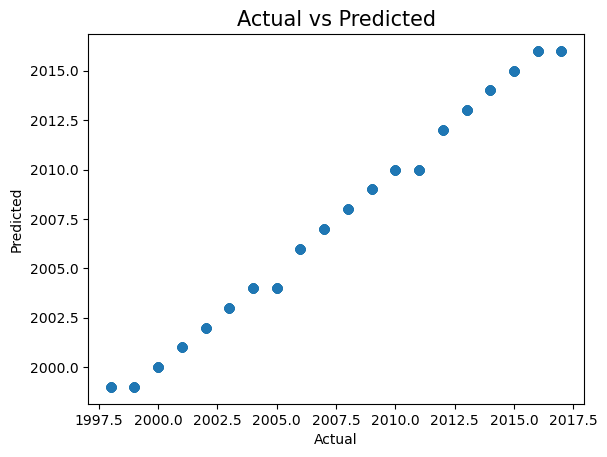

In [39]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted",fontsize=15)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**4.Random Forest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [41]:
y_pred=rfc.predict(x_test)
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Testing score\n",accuracy_score(y_test,y_pred)*100)


              precision    recall  f1-score   support

        1998       1.00      1.00      1.00        66
        1999       1.00      1.00      1.00        62
        2000       1.00      1.00      1.00        78
        2001       1.00      1.00      1.00        56
        2002       1.00      1.00      1.00        57
        2003       1.00      1.00      1.00        58
        2004       1.00      1.00      1.00        71
        2005       1.00      1.00      1.00        72
        2006       1.00      1.00      1.00        57
        2007       1.00      1.00      1.00        67
        2008       1.00      1.00      1.00        57
        2009       0.97      1.00      0.98        65
        2010       1.00      0.95      0.97        60
        2011       0.99      1.00      0.99        71
        2012       0.98      1.00      0.99        56
        2013       0.99      0.99      0.99        74
        2014       1.00      0.98      0.99        66
        2015       1.00    

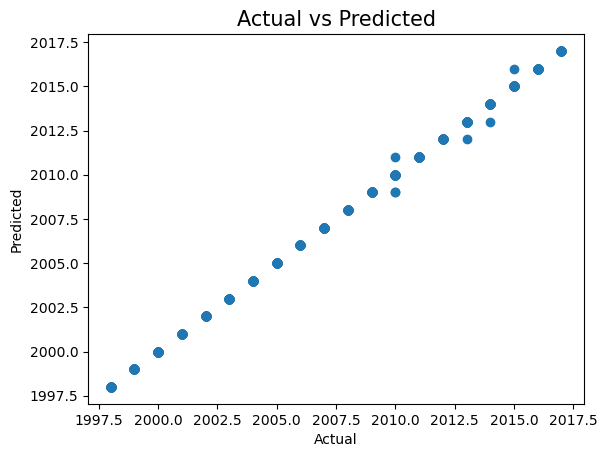

In [42]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted",fontsize=15)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [43]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
values

,Actual,Predicted
5253,2011,2011
1132,2013,2013
842,2002,2002
3368,1999,1999
5687,2007,2007
...,...,...
1070,2011,2011
3106,2015,2015
2698,2006,2006
3228,1998,1998


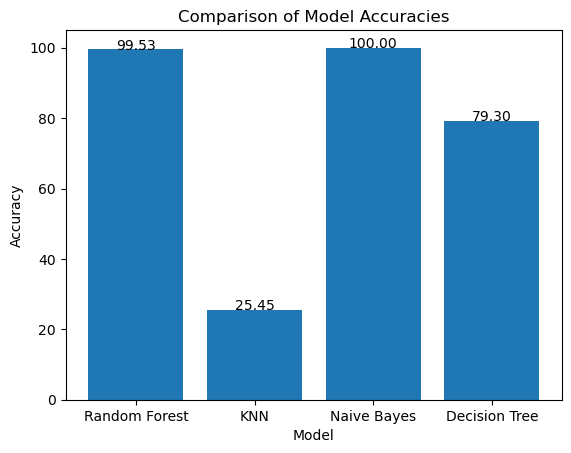

In [44]:
# Define the data
a1 = rfc.score(x_test, y_test) * 100
a2 = knn.score(x_test, y_test) * 100
a3 = gnb.score(x_test, y_test) * 100
a4 = dtree.score(x_test, y_test) * 100

accuracies = [a1, a2, a3, a4]
models = ['Random Forest', 'KNN', 'Naive Bayes','Decision Tree']

# Create the bar chart
plt.bar(models, accuracies)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Add text labels to each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.2f}", color='black', ha='center')

# Show the plot
plt.show()

# CONCLUSION:

**So we get a good accuracy and training score of about 100 % using Random Forest Classifier.**

**The accuracy of other models can be increased by Hypertuning.**

#  Geopandas

In [45]:
import geopandas as gpd
net = gpd.read_file(r"C:\Users\rutik\Downloads\BRA_adm\BRA_adm2.shp")
net

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,33,BRA,Brazil,1,Acre,1,Acrelândia,Município,Municipality,None,None,"POLYGON ((-67.16084 -9.98260, -67.15184 -9.978..."
1,33,BRA,Brazil,1,Acre,2,Assis Brazil,Município,Municipality,None,None,"POLYGON ((-69.56518 -10.95550, -69.56603 -10.9..."
2,33,BRA,Brazil,1,Acre,3,Brasiléia,Município,Municipality,None,None,"POLYGON ((-69.42356 -10.92717, -69.41938 -10.9..."
3,33,BRA,Brazil,1,Acre,4,Bujari,Município,Municipality,None,None,"POLYGON ((-67.94034 -9.33722, -67.94411 -9.339..."
4,33,BRA,Brazil,1,Acre,5,Capixaba,Município,Municipality,None,None,"POLYGON ((-68.00378 -10.65377, -68.00352 -10.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5499,33,BRA,Brazil,27,Tocantins,5500,Tocantinópolis,Município,Municipality,None,None,"POLYGON ((-47.72358 -6.28225, -47.72491 -6.184..."
5500,33,BRA,Brazil,27,Tocantins,5501,Tupirama,Município,Municipality,None,None,"POLYGON ((-48.56583 -8.52442, -48.54983 -8.529..."
5501,33,BRA,Brazil,27,Tocantins,5502,Tupiratins,Município,Municipality,None,None,"POLYGON ((-48.13288 -8.54492, -48.14794 -8.567..."
5502,33,BRA,Brazil,27,Tocantins,5503,Wanderlândia,Município,Municipality,None,None,"POLYGON ((-48.12951 -6.78305, -48.12915 -6.623..."


In [46]:
net.drop(columns=["NL_NAME_2","VARNAME_2"],inplace=True)

In [47]:
net['Forestfire no'] = data['number']
net

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,geometry,Forestfire no
0,33,BRA,Brazil,1,Acre,1,Acrelândia,Município,Municipality,"POLYGON ((-67.16084 -9.98260, -67.15184 -9.978...",0.0
1,33,BRA,Brazil,1,Acre,2,Assis Brazil,Município,Municipality,"POLYGON ((-69.56518 -10.95550, -69.56603 -10.9...",0.0
2,33,BRA,Brazil,1,Acre,3,Brasiléia,Município,Municipality,"POLYGON ((-69.42356 -10.92717, -69.41938 -10.9...",0.0
3,33,BRA,Brazil,1,Acre,4,Bujari,Município,Municipality,"POLYGON ((-67.94034 -9.33722, -67.94411 -9.339...",0.0
4,33,BRA,Brazil,1,Acre,5,Capixaba,Município,Municipality,"POLYGON ((-68.00378 -10.65377, -68.00352 -10.6...",0.0
...,...,...,...,...,...,...,...,...,...,...,...
5499,33,BRA,Brazil,27,Tocantins,5500,Tocantinópolis,Município,Municipality,"POLYGON ((-47.72358 -6.28225, -47.72491 -6.184...",11.0
5500,33,BRA,Brazil,27,Tocantins,5501,Tupirama,Município,Municipality,"POLYGON ((-48.56583 -8.52442, -48.54983 -8.529...",14.0
5501,33,BRA,Brazil,27,Tocantins,5502,Tupiratins,Município,Municipality,"POLYGON ((-48.13288 -8.54492, -48.14794 -8.567...",11.0
5502,33,BRA,Brazil,27,Tocantins,5503,Wanderlândia,Município,Municipality,"POLYGON ((-48.12951 -6.78305, -48.12915 -6.623...",22.0


<AxesSubplot:>

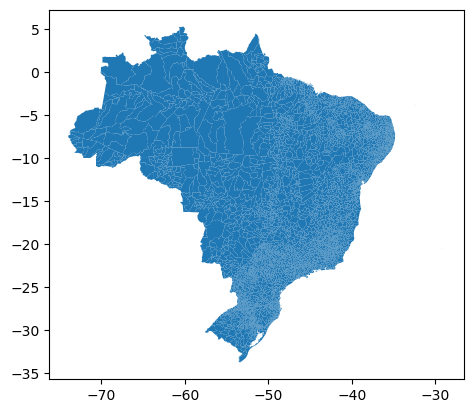

In [48]:
net.plot()

<AxesSubplot:>

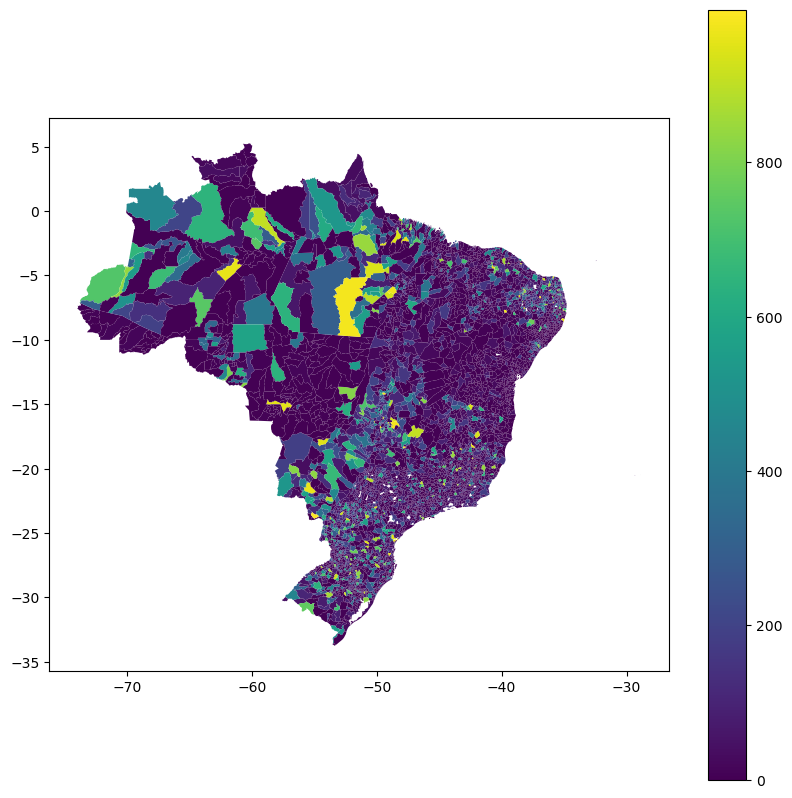

In [49]:
net.plot(column= 'Forestfire no', legend = True, figsize = (10,10))

In [50]:
net['AREA'] = net.area
net['Centroid']=net.centroid
net['Boundary']=net.boundary
net

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,geometry,Forestfire no,AREA,Centroid,Boundary
0,33,BRA,Brazil,1,Acre,1,Acrelândia,Município,Municipality,"POLYGON ((-67.16084 -9.98260, -67.15184 -9.978...",0.0,0.130731,POINT (-66.93057 -9.92879),"LINESTRING (-67.16084 -9.98260, -67.15184 -9.9..."
1,33,BRA,Brazil,1,Acre,2,Assis Brazil,Município,Municipality,"POLYGON ((-69.56518 -10.95550, -69.56603 -10.9...",0.0,0.239514,POINT (-70.16260 -10.87442),"LINESTRING (-69.56518 -10.95550, -69.56603 -10..."
2,33,BRA,Brazil,1,Acre,3,Brasiléia,Município,Municipality,"POLYGON ((-69.42356 -10.92717, -69.41938 -10.9...",0.0,0.361400,POINT (-69.15011 -10.76825),"LINESTRING (-69.42356 -10.92717, -69.41938 -10..."
3,33,BRA,Brazil,1,Acre,4,Bujari,Município,Municipality,"POLYGON ((-67.94034 -9.33722, -67.94411 -9.339...",0.0,0.285597,POINT (-68.20649 -9.58609),"LINESTRING (-67.94034 -9.33722, -67.94411 -9.3..."
4,33,BRA,Brazil,1,Acre,5,Capixaba,Município,Municipality,"POLYGON ((-68.00378 -10.65377, -68.00352 -10.6...",0.0,0.143504,POINT (-67.83721 -10.47664),"LINESTRING (-68.00378 -10.65377, -68.00352 -10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,33,BRA,Brazil,27,Tocantins,5500,Tocantinópolis,Município,Municipality,"POLYGON ((-47.72358 -6.28225, -47.72491 -6.184...",11.0,0.088134,POINT (-47.53767 -6.25706),"LINESTRING (-47.72358 -6.28225, -47.72491 -6.1..."
5500,33,BRA,Brazil,27,Tocantins,5501,Tupirama,Município,Municipality,"POLYGON ((-48.56583 -8.52442, -48.54983 -8.529...",14.0,0.244961,POINT (-48.39804 -8.78669),"LINESTRING (-48.56583 -8.52442, -48.54983 -8.5..."
5501,33,BRA,Brazil,27,Tocantins,5502,Tupiratins,Município,Municipality,"POLYGON ((-48.13288 -8.54492, -48.14794 -8.567...",11.0,0.073571,POINT (-48.21106 -8.35661),"LINESTRING (-48.13288 -8.54492, -48.14794 -8.5..."
5502,33,BRA,Brazil,27,Tocantins,5503,Wanderlândia,Município,Municipality,"POLYGON ((-48.12951 -6.78305, -48.12915 -6.623...",22.0,0.112510,POINT (-48.00167 -6.91129),"LINESTRING (-48.12951 -6.78305, -48.12915 -6.6..."


<AxesSubplot:>

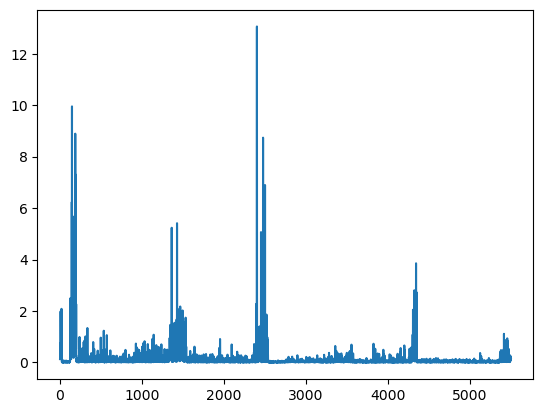

In [51]:
net.AREA.plot()

<AxesSubplot:>

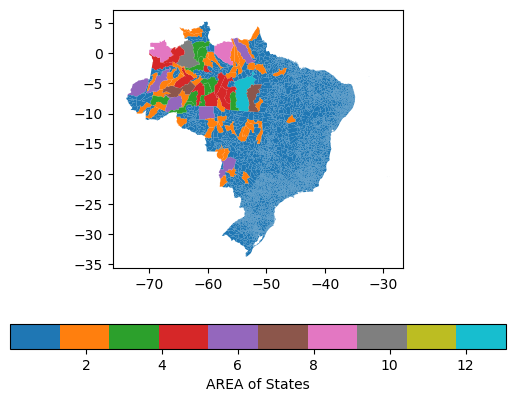

In [52]:
net.plot(column="AREA",legend=True , legend_kwds={'label':"AREA of States",
                    "orientation":"horizontal"},cmap='tab10')

In [53]:
#calculating distance
pt=net['Centroid'].iloc[2]
net['distance']=net['Centroid'].distance(pt)
net['distance']

0        2.372985
1        1.018034
2        0.000000
3        1.512590
4        1.344902
          ...    
5499    22.078239
5500    20.846467
5501    21.077469
5502    21.497277
5503    21.207098
Name: distance, Length: 5504, dtype: float64

# Connecting dataframe to postgis

In [55]:
import psycopg2 
import pandas as pd
import psycopg2.extras
import numpy as np

#Create connection object
connection=psycopg2.connect(database="postgres",user="postgres",password="postgres")

dt=pd.read_csv("amazon.csv", encoding = 'latin1') #The "encoding" parameter is used to specify the character encoding of the file.


#drop the not required columns
dt.drop(columns=["number"],inplace=True)

# Create a cursor with the DATETIME support
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)#This enables the cursor to return rows as dictionaries, which can be more convenient for data manipulation.

#table creation
cursor.execute("drop table if exists dt;")
cursor.execute("create table dt (year numeric,state text,month text,date text)")
print("Table created!")

#commit transaction
connection.commit() #permanent the changes that were made within a transaction.


# Iterate through the DataFrame and insert the values into the database
for index, row in dt.iterrows():
    cursor.execute("INSERT INTO dt VALUES (%s, %s, %s, %s)", (row["year"], row["state"],row["month"],row["date"]))
    connection.commit()
print("Values inserted !!")
   
#close the connection
cursor.close()
connection.close()

Table created!
Values inserted !!
